# Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

# Domain:
Object recognition

# Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles

# Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.

# Attribute Information:
 All the features are geometric features extracted from the silhouette.
 All are numeric in nature.

In [1]:
###  Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set(rc={'figure.figsize':(13.7,8.27)}) # setting constant to increase seaborn graph sizes

In [2]:
### 2. Read the data as a data frame
rawVehDf = pd.read_csv('vehicle-2.csv')
rawVehDf.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print("Size of dataframe is " +color.BOLD+ format(rawVehDf.size) + color.END)
print("Shape(#rows,#columns) of dataframe is "+color.BOLD+ format(rawVehDf.shape) + color.END)
print("Dataframe information \n")
print(rawVehDf.info())


Size of dataframe is 16074
Shape(#rows,#columns) of dataframe is (846, 19)
Dataframe information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1      

## 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm 

We can see that class variable is non numeric. Apart from that other columns are numeric.

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
le = LabelEncoder() 
vehdf = rawVehDf.copy()
vehdf['class'] = le.fit_transform(vehdf['class'])
print(vehdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
#checking for missing values
vehdf.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
# Replacing missing values of with median
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
X = vehdf.iloc[:,0:19] #separting all numercial independent attribute
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
#fill missing values with median column values
transformed_values = imputer.fit_transform(X)
cleanedVehdf = pd.DataFrame(transformed_values, columns = X.columns )
cleanedVehdf.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
## 5 point summary of attributes
cleanedVehdf.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

Observation from 5 point summary
- Apart from 

radius_ratio,
scatter_ratio, 
scaled_variance.1

all others have median vary close to mean . It is indication of these features having symmetric normal distribution.




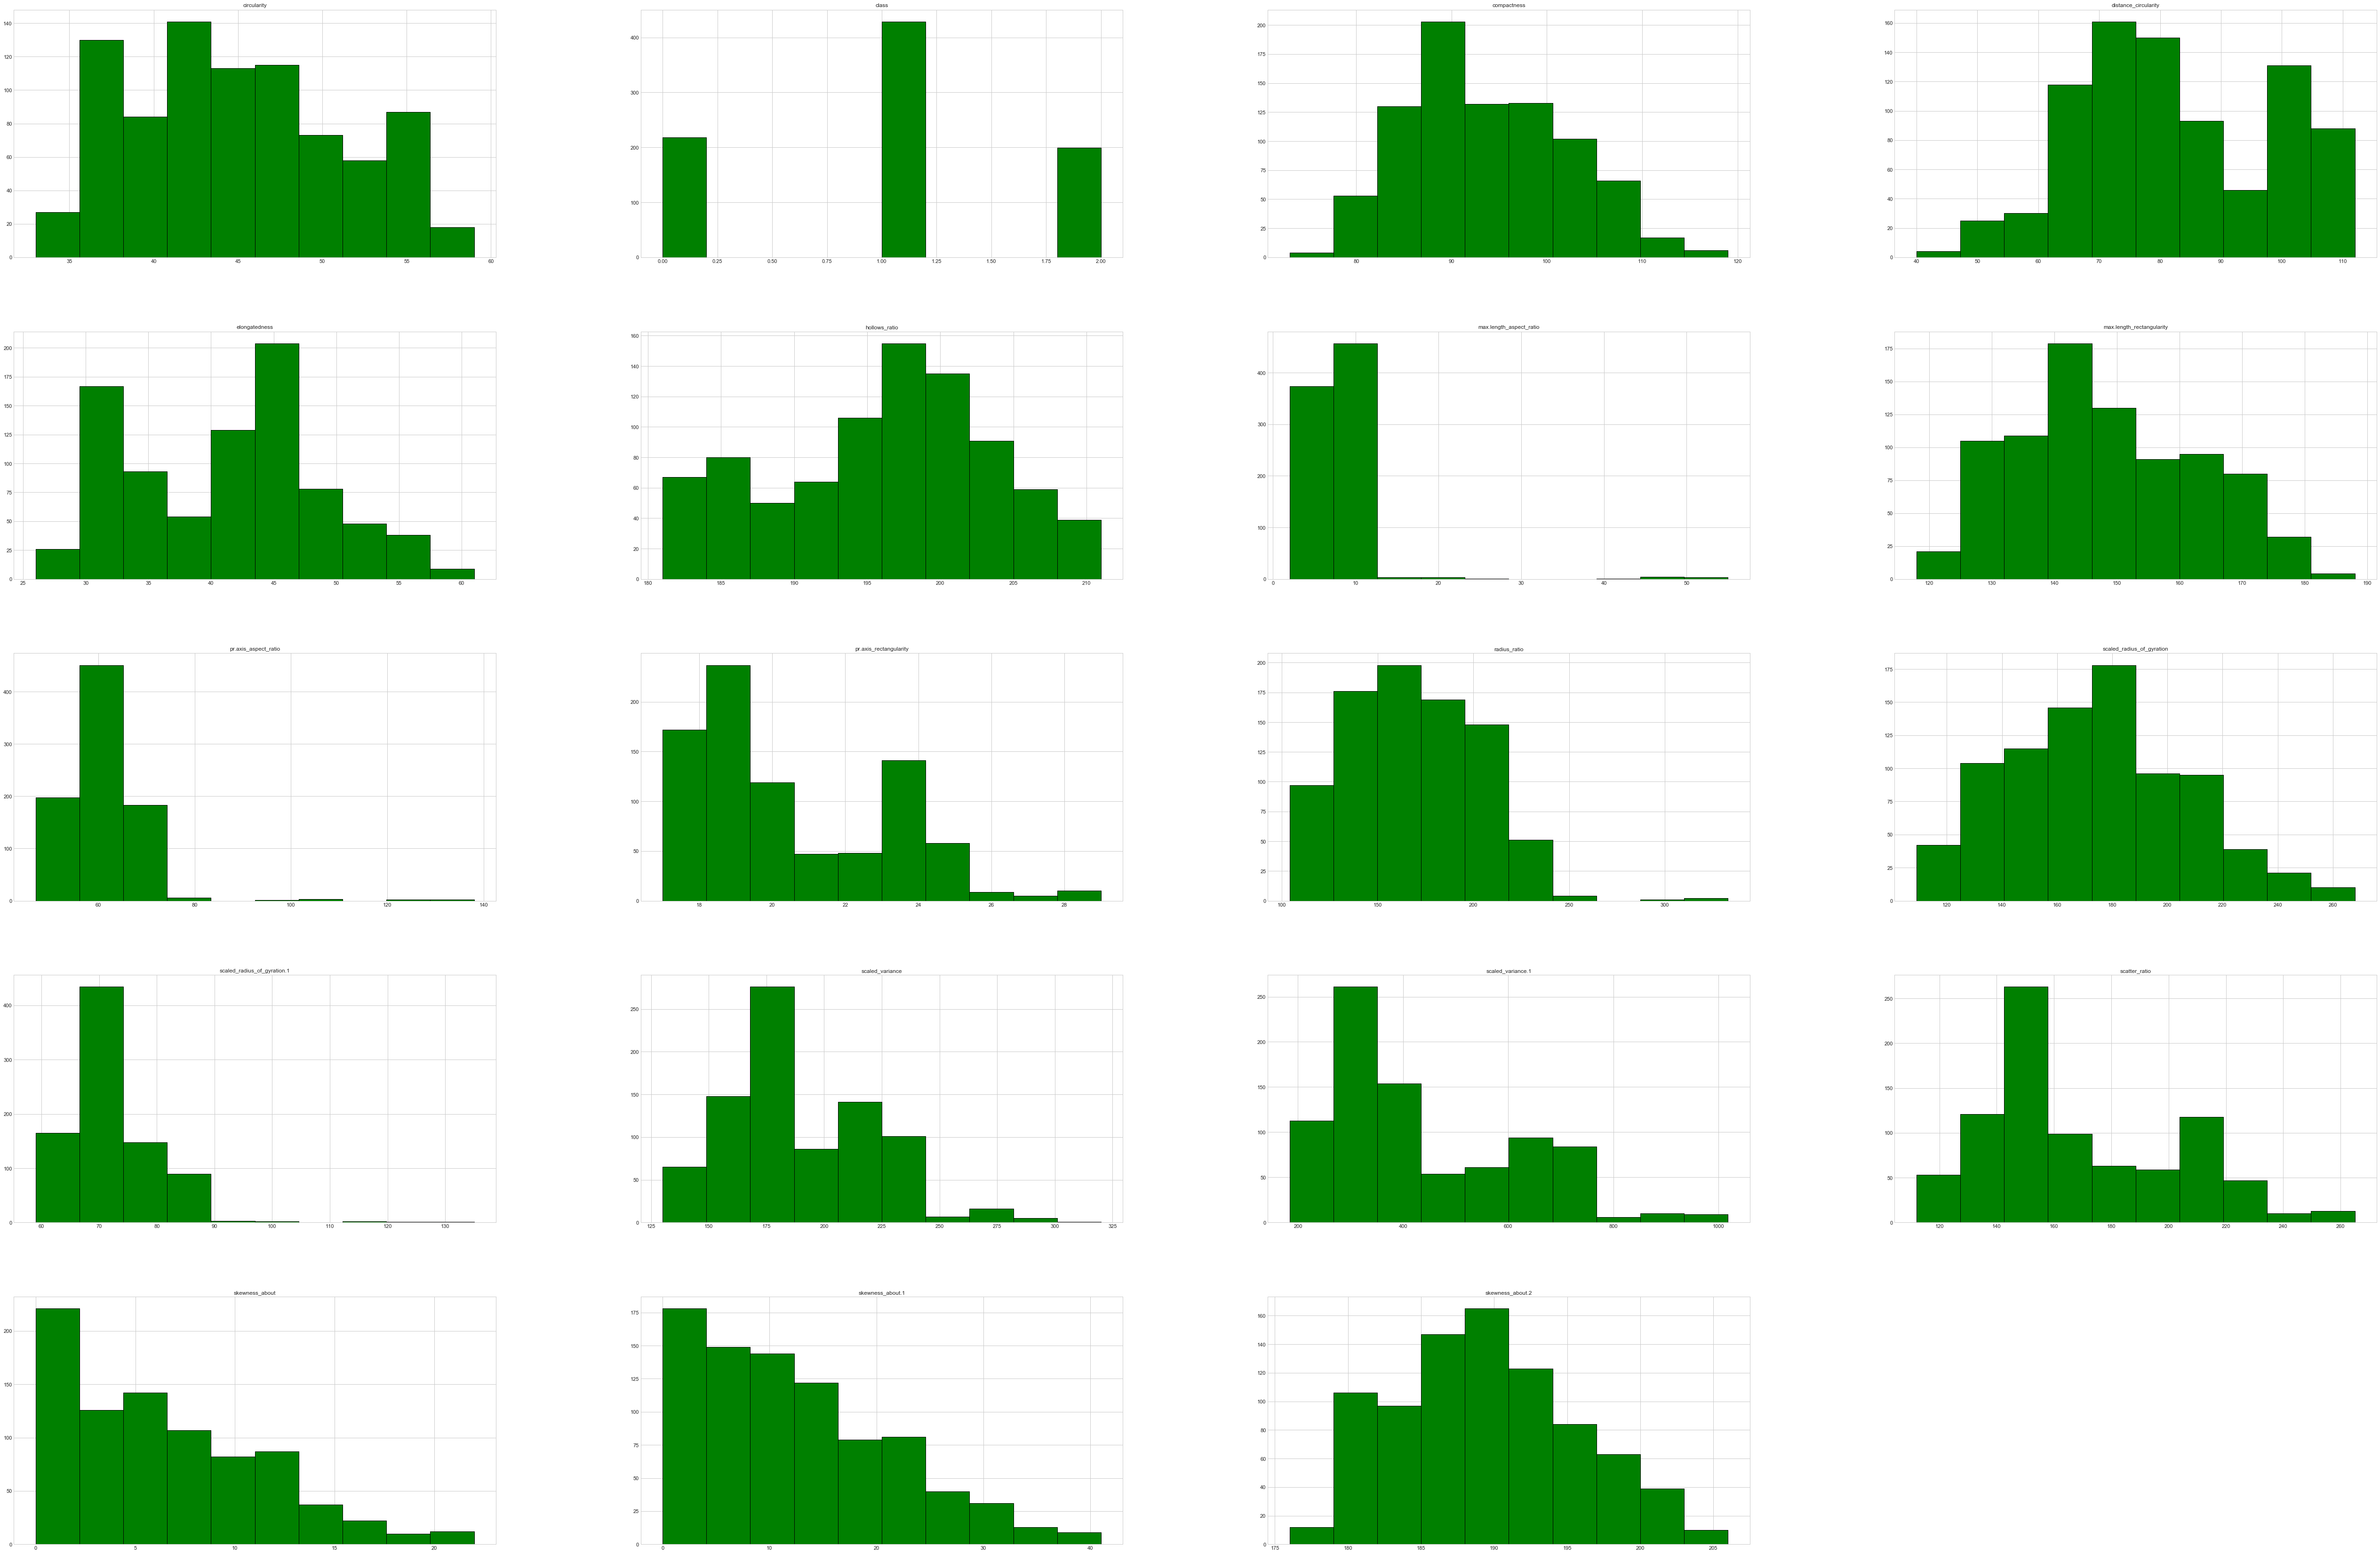

In [8]:
plt.style.use('seaborn-whitegrid')
cleanedVehdf.hist(bins=10,  figsize=(90,60),color='green', edgecolor = 'black')
plt.show()

As seen from the plots below distributions are skewed.
 - pr.axis_aspect_ratio           
 - max.length_aspect_ratio        
 - scaled_radius_of_gyration.1 

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis 

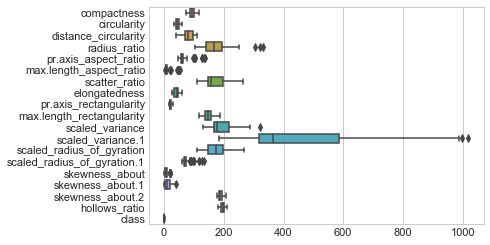

In [9]:
#we will look into all the boxplot individually to trace out outliers
ax = sns.boxplot(data=cleanedVehdf, orient="h")

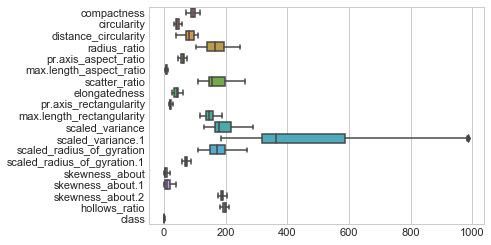

In [10]:
# Boxplots show present of outliers as whiskers can be seen. We will treat outlier by using Inter quantile range.

Q1 = cleanedVehdf.quantile(0.25)
Q3 = cleanedVehdf.quantile(0.75)
IQR = Q3 - Q1
finalVehDf = cleanedVehdf[~((cleanedVehdf < (Q1 - 1.5 * IQR)) |(cleanedVehdf > (Q3 + 1.5 * IQR))).any(axis=1)]
finalVehDf.shape
# boxplot after removing outlier
ax = sns.boxplot(data=finalVehDf, orient="h")

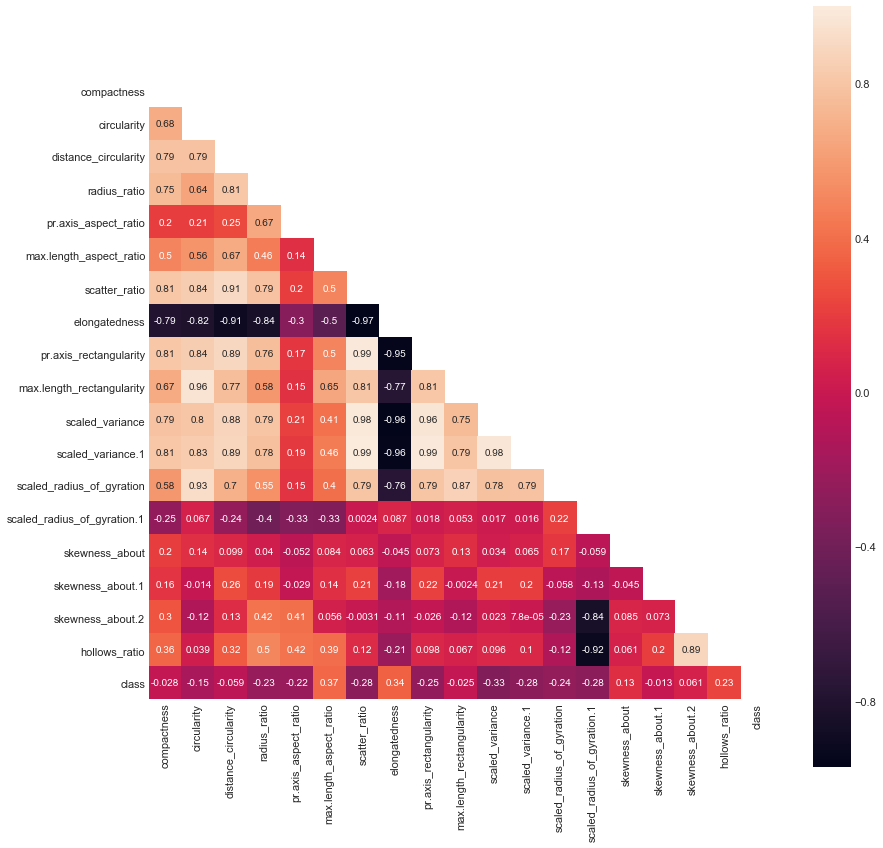

In [11]:
## lets see correlation heatmap
mask = np.zeros_like(finalVehDf.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(14, 14))
sns.heatmap(finalVehDf.corr(), mask=mask,annot=True,square=True)

Observation From Correlation Hetamap:
Strong/fare Correlation:
      - Between pr.axis_rectangularity and scatter_ratio 0.99
      - Between Scaled Variance and  Scaled Variance. 0.98
      - Between skewness_about_2 and hollow_ratio 0.89
      - ditance_circularity and radius_ratio  0.81
      - pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81 
      - scatter_ratio and elongatedness seems to be have strong negative correlation val : -0.97
      - elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  -0.95

Little To No Correlation: 
      -max_length_aspect_ratio & radius_ratio have average correlation with coeff: 0.5
      - pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
      - scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
      - scaled_radius_gyration.1 & skewness_about seems to be very little correlated
      - skewness_about & skewness_about.1 not be correlated
      - skewness_about.1 and skewness_about.2 are not correlated.

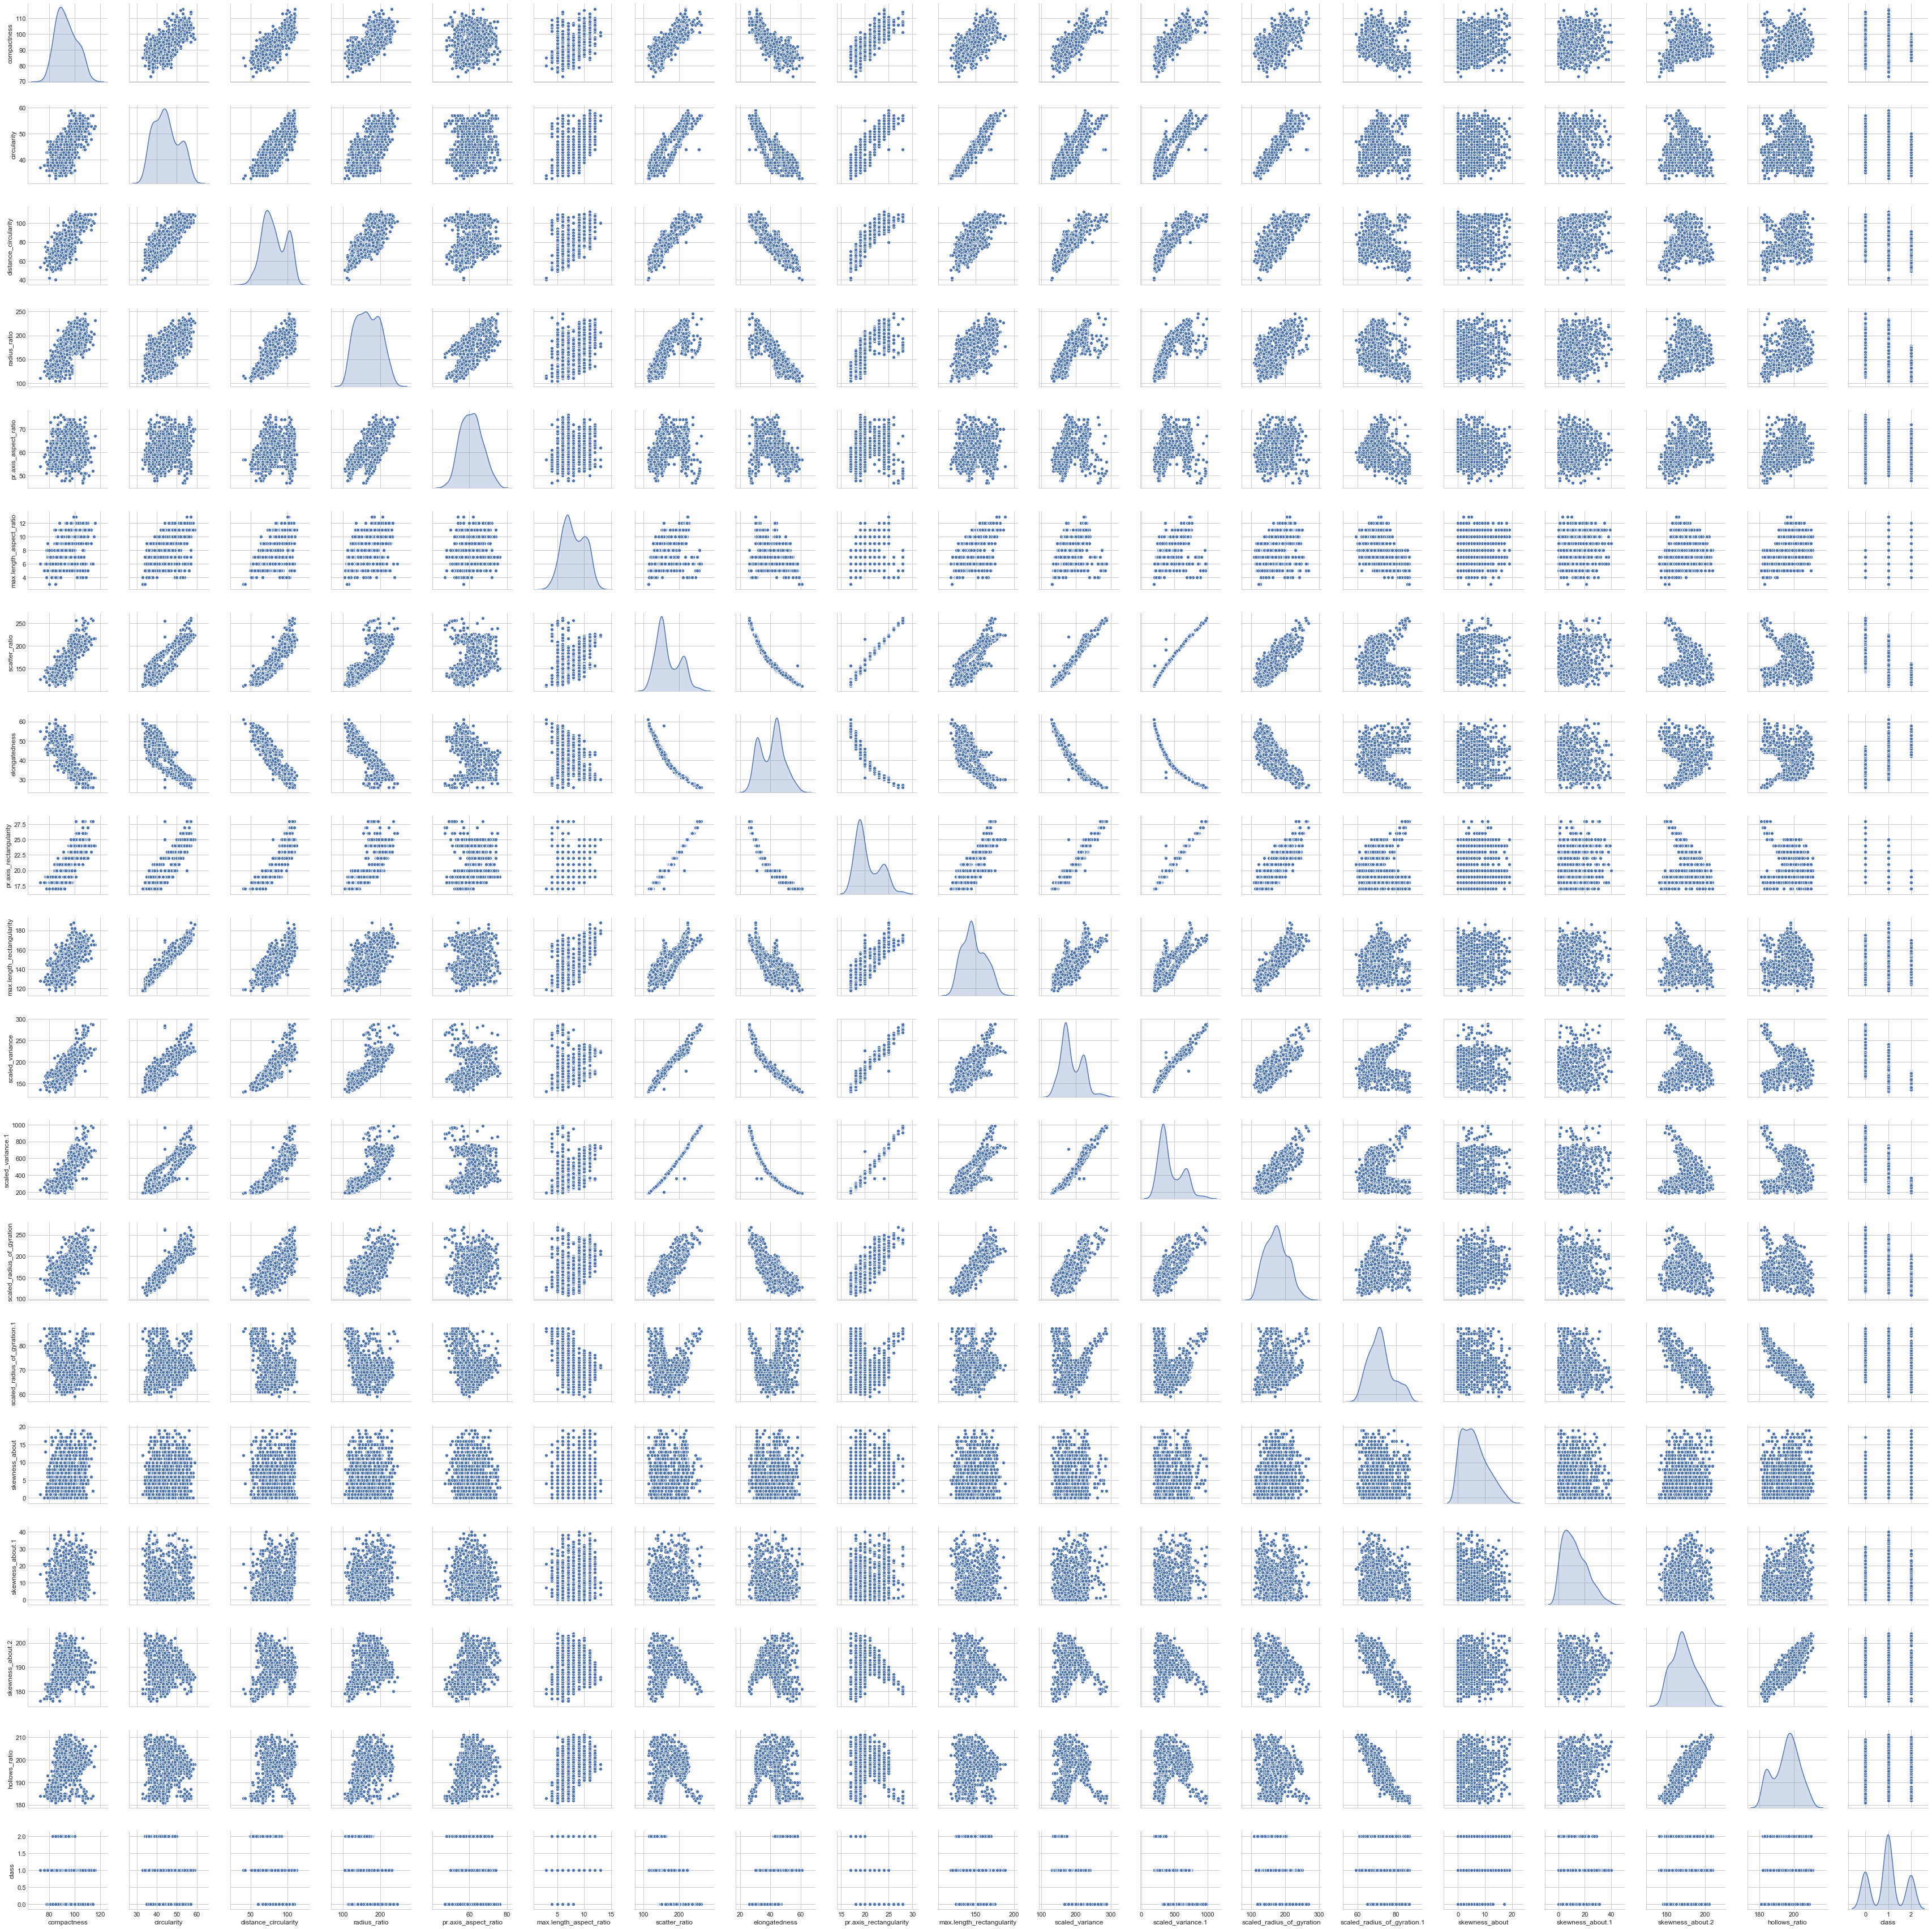

In [12]:
sns.pairplot(finalVehDf,diag_kind="kde",palette="husl")

https://en.wikipedia.org/wiki/Multicollinearity
In statistics, multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multivariate regression model with collinear predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

If two features is highly correlated then we shuld use only one feature. SNS heatmap gives us the correlation matrix where we can see which features are highly correlated.

We will get rid of columns whose correlation is +-0.9 or above.There are 8 such columns:

- circularity - scaled_radius_of_gyration - We will drop scaled_radius_of_gyration
- circularity - max.length_rectangularity - We will drop max.length_rectangularity
- scatter_ratio - elongatedness - We will drop elongatedness 
- scaled_variance pr.axis_rectangularity - We will drop pr.axis_rectangularity 
- scaled_variance -scaled_variance.1. We will drop scaled_variance.1


In [13]:
subsetcolumnVehicleDF = finalVehDf.copy()
subsetcolumnVehicleDF = subsetcolumnVehicleDF.drop('scaled_radius_of_gyration', axis=1)
subsetcolumnVehicleDF = subsetcolumnVehicleDF.drop('max.length_rectangularity', axis=1)
subsetcolumnVehicleDF = subsetcolumnVehicleDF.drop('elongatedness', axis=1)
subsetcolumnVehicleDF = subsetcolumnVehicleDF.drop('pr.axis_rectangularity', axis=1)
subsetcolumnVehicleDF = subsetcolumnVehicleDF.drop('scaled_variance.1', axis=1)
subsetcolumnVehicleDF.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0         95.0         48.0                  83.0         178.0   
1         91.0         41.0                  84.0         141.0   
2        104.0         50.0                 106.0         209.0   
3         93.0         41.0                  82.0         159.0   
5        107.0         44.0                 106.0         172.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                     10.0          162.0   
1                  57.0                      9.0          149.0   
2                  66.0                     10.0          207.0   
3                  63.0                      9.0          144.0   
5                  50.0                      6.0          255.0   

   scaled_variance  scaled_radius_of_gyration.1  skewness_about  \
0            176.0                         70.0             6.0   
1            170.0                         72.0             9.0   
2            223.0                         73.0            14.0   
3            160.0                         63.0             6.0   
5            280.0                         85.0             5.0   

   skewness_about.1  skewness_about.2  hollows_ratio  class  
0              16.0             187.0          197.0    2.0  
1              14.0             189.0          199.0    2.0  
2               9.0             188.0          196.0    1.0  
3              10.0             199.0          207.0    2.0  
5               9.0             181.0          183.0    0.0

## 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn)

In [14]:
y = subsetcolumnVehicleDF['class']

subsetcolumnVehicleDF.drop(['class'],axis=1,inplace=True)
print("Subset Column Dataframe",subsetcolumnVehicleDF.shape)

#for PCA
finalVehDf.drop(['class'],axis=1,inplace=True)
print("All Column except y Dataframeshape ",finalVehDf.shape)
print("shape of y",y.shape)

Subset Column Dataframe (813, 13)
All Column except y Dataframeshape  (813, 18)
shape of y (813,)


C:\Users\phlegmatic\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
#normalizing all column using z score
from scipy.stats import zscore
X_std_subset = subsetcolumnVehicleDF.apply(zscore)
X_std = finalVehDf.apply(zscore)


## 4.Train a Support vector machine using the train set and get the accuracy on the test set

In [16]:
#spliting training test size to 80:20
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.20,random_state=28)
#subset data
subset_X_train,subset_X_test,subset_y_train,subset_y_test = train_test_split(X_std_subset,y,test_size=0.20,random_state=28)

from sklearn.svm import SVC
svc= SVC(gamma='scale')
svc.fit(Orig_X_train, Orig_y_train)
svcpred = svc.predict(Orig_X_test)

print("All column acuracy score:",accuracy_score(Orig_y_test, svcpred)*100)
from sklearn.svm import SVC
svc= SVC(gamma='scale')
svc.fit(subset_X_train, subset_y_train)
svcpred = svc.predict(subset_X_test)
print("Subset columns score:",accuracy_score(subset_y_test, svcpred)*100)

All column acuracy score: 96.31901840490798
Subset columns score: 96.31901840490798


## 5. Perform K-fold cross validation and get the cross validation score of the model

In [17]:
num_folds = 5
seed = 28
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(svc, Orig_X_train, Orig_y_train, cv=kfold)
print(results)
print("All column cross_val_score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

# for subset columns
results = cross_val_score(svc, subset_X_train, subset_y_train, cv=kfold)
print(results)
print("Subset column cross_val_score: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))



[0.97692308 0.96153846 0.91538462 0.99230769 0.97692308]
All column cross_val_score: 96.462% (2.647%)
[0.98461538 0.95384615 0.90769231 0.97692308 0.96153846]
Subset column cross_val_score: 95.692% (2.691%)


## 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

In [18]:
covMatrix = np.cov(X_std.T)
print("cov_matrix shape:",covMatrix.shape)
print("Covariance_matrix",covMatrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72251046e-01 -8.97284818e-02  2.26045073e-02  1.30419032e-01
  -1.52324139e-01  2.58374578e-01 -1.88794221e-01 -7.71578238e-01
  -3.61784776e-01 -1.25233628e-01  2.92009470e-02  7.62442008e-04
  -1.06680587e-02  1.05983722e-02 -1.01407495e-01 -1.46326861e-01
  -3.81638532e-03  3.32992130e-03]
 [-2.85370045e-01  1.33173937e-01  2.10809943e-01 -2.06785531e-02
   1.39022591e-01 -6.88979940e-02  3.90871235e-01 -6.60528436e-02
  -4.62957583e-02  2.40262612e-01  7.29503235e-02  1.93799916e-01
  -7.74670931e-03 -8.71766559e-02 -3.11337823e-01  1.96463651e-01
  -2.96230720e-01  5.83996136e-01]
 [-3.01486231e-01 -4.40259591e-02 -7.08780817e-02  1.07425217e-01
   8.07335409e-02 -2.04800896e-02 -1.76384547e-01  2.98693883e-01
  -2.64499195e-01 -9.42971834e-02  7.78755026e-01 -2.32649049e-01
   1.11905744e-02  2.28724292e-02  5.89166755e-02  5.33931974e-02
   9.72735293e-02  8.64160083e-02]
 [-2.72594510e-01 -2.04232234e-01 -4.02139629e-02 -2.52957341e-01
  -1.19012554e-01 -

In [20]:
# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.792975698382946, array([-0.27225105, -0.28537005, -0.30148623, -0.27259451, -0.09857976,
       -0.19475579, -0.31051844,  0.30843834, -0.30754849, -0.27630107,
       -0.30274811, -0.30704063, -0.26152049,  0.04363236, -0.0367057 ,
       -0.05885041, -0.03483739, -0.08281362])), (3.3771064398939745, array([-0.08972848,  0.13317394, -0.04402596, -0.20423223, -0.25913686,
       -0.09457563,  0.07233508, -0.01168768,  0.08409153,  0.12583663,
        0.07019986,  0.07793366,  0.20992728,  0.50391445, -0.01456825,
       -0.09339805, -0.50166421, -0.50654656])), (1.208730539635098, array([ 0.02260451,  0.21080994, -0.07087808, -0.04021396,  0.11480523,
        0.13931348, -0.1129247 ,  0.09003305, -0.11106355,  0.21987769,
       -0.14481876, -0.11532395,  0.21362744, -0.06739209,  0.52162344,
       -0.68717064,  0.06220695,  0.04080354])), (1.1365956021766952, array([ 0.13041903, -0.02067855,  0.10742522, -0.25295734, -0.605228  ,
        0.32253141, -0.01005404,  0.07991176,  0.0

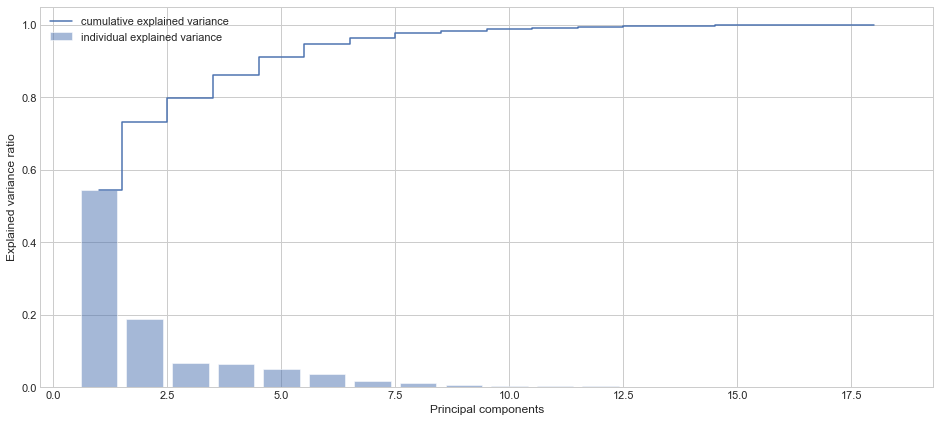

In [21]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
plt.figure(figsize=(16,7))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [22]:
#- From above we plot we can clealry observer that 8 dimensions are able to explain 95 %variance of data. 
# Hence we will use first 8 principal components going forward and calulate the reduced dimensions.

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space
X_std_pca_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions
reduced_pca_vehicledf = pd.DataFrame(X_std_pca_8D)  # converting array to dataframe for pairplot

reduced_pca_vehicledf.head(5)

0         1         2         3         4         5         6  \
0 -0.591125 -0.655523  0.564477 -0.659870  0.855251 -1.835814  0.155983   
1  1.524878 -0.327117  0.251528  1.296236  0.282463 -0.091649 -0.209862   
2 -3.969982  0.239514  1.229875  0.180391 -0.919360 -0.650638 -0.826445   
3  1.549729 -3.037566  0.466449  0.394413  0.623392  0.383794 -0.131539   
4 -5.468963  4.651385 -1.290061  0.023804 -1.692033  2.510965 -0.315330   

          7  
0 -0.683144  
1  0.127745  
2  0.163185  
3 -0.176248  
4  0.475009

## 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier

In [23]:
#spliting training test size to 80:20
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#orginal Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca_vehicledf,y,test_size=0.20,random_state=28)

from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(pca_X_train, pca_y_train)
pca_svcpred = svc.predict(pca_X_test)
print(accuracy_score(pca_y_test, pca_svcpred)*100)

96.31901840490798


In [24]:
num_folds = 5
seed = 28
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(svc, pca_X_train, pca_y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.96923077 0.96153846 0.9        0.96923077 0.93846154]
Accuracy: 94.769% (2.638%)


## 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings


Accuracy score and cross validation score of SVM using raw data is  almost same using data using principal components.
So we gain massively in performance and explainablily on using PCA. Number of Colummns in this dataset are not that high( 19 )but PCA will be essential when we have large number of columns. 

Also we manually dropped few columns having high correlation and model accuracy and cross validation score was improved. PCA could also has similar effect. Dropping column required analysing each column and it has risk of making error in judgement. PCA is helpful to consider all dimension and reduce them.